In [3]:
#!pip install ipynb
from ipynb.fs.full.video_actions_v2 import *

# Applications

In [4]:
_app_test = SimpleApplicationWidget(filename = '_EasyVideoPipeLine_641_481.json')

Output()

<Task pending name='test' coro=<HaltableActionExecutor.my_code() running at /home/jovyan/work/data/scray/projects/edge/coral/actions/video_actions_v2.ipynb:1362>>


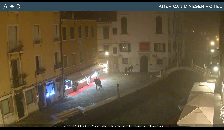

In [24]:
app=_app_test
#display(app._tab.displayWidget.action.image['image']) 
_image=app._tab.displayWidget.image
app._tab.evaluateWidgetActionList(image=_image)['image']

In [ ]:
_action=app._tab.displayWidget.action
_files= sorted(listdir(_action.directory))
_files

In [25]:
app._tab.displayWidget.action.__dict__

{'sources': <ipynb.fs.full.video_actions_v2.LiveVideoSources at 0x7f297c740cd0>,
 'id': '../../../../../Dec-18/JqUREqYduHw',
 'index': 0,
 'skipframes': 10,
 'video': None,
 'directory': '../../../../../Dec-18/JqUREqYduHw',
 'position': 35,
 '_last_state': {'id': '../../../../../Dec-18/JqUREqYduHw', 'index': 0}}

In [25]:
app= _app_test
_video = app._tab._widgets[0]
_video.on_video_new_button_clicked('')  
#_file=_files[6]
_file='6We73xIdHy0'
_path=_directory + '/' + _file
_video.video_directory.value=_path
_video.add_new_directory(_path)
_video.video_filename.value='../data/images/single/images_'+_file+'.json'
_video.on_video_save_button_clicked('')   
#_video.on_value_submit_video_directory('',_video.video_directory)

"\napp= _app_test\n_video = app._tab._widgets[0]\n_video.on_video_new_button_clicked('')  \n#_file=_files[6]\n_file='6We73xIdHy0'\n_path=_directory + '/' + _file\n_video.video_directory.value=_path\n_video.add_new_directory(_path)\n_video.video_filename.value='../data/images/single/images_'+_file+'.json'\n_video.on_video_save_button_clicked('')   \n#_video.on_value_submit_video_directory('',_video.video_directory)\n"

In [28]:
_directory='../../../../../Dec-18'
listdir(_directory)[0]
_path=_directory + '/' + _file

NameError: name '_file' is not defined

In [54]:
# remove checkpoint files and directories starting with a '.'
import os
import shutil
app= _app_test
_video = app._tab._widgets[0]
_directory='../../../../../Dec-18'
#_file=listdir(_directory)[0]
for _dir in listdir(_directory):
    _path=_directory + '/' + _dir
    _files= sorted(listdir(_path))
    for _file in _files:
        if 'checkpoint' in _file and _file[0]!='.':
            print(_path + '/' + _file)
            os.remove(_path + '/' + _file)
        #if 'checkpoint' in _file and _file[0]=='.':  
        if _file[0]=='.':      
            print(_path + '/' + _file)
            shutil.rmtree(_path + '/' + _file)

In [159]:
def display_image(_path2,dir , time):
    _image= {'image':Image.open(_path2)}
    display(dir , time)
    display(app._tab.evaluateWidgetActionList(image=_image)['image'])

def display_dir_images_hour(_path):
    _files= sorted(listdir(_path))
    _current = -1
    for _file in _files:
        _path2 = _path + '/' + _file
        #print(_path2)    
        try:
            #print(_path2.split('_')[3].split('-')[2].split(':'))
            time = _path2.split('_')[3].split('-')[2].split(':')
            hour = time[0]
            if _current != hour:
                #print(_path2,hour,_current)
                _current = hour
                _image= {'image':Image.open(_path2)}
                display(_dir , time)
                display(app._tab.evaluateWidgetActionList(image=_image)['image'])
        except Exception as e: 
            #print(_path2)
            pass    

def display_dir_images_minute(_path,hour):
    _files= sorted(listdir(_path))
    _current = -1
    for _file in _files:
        _path2 = _path + '/' + _file
        #print(_path2)    
        try:
            #print(_path2.split('_')[3].split('-')[2].split(':'))
            time = _path2.split('_')[3].split('-')[2].split(':')
            _hour     = time[0]
            _minutes  = time[1]
            
            if _current != _minutes and _hour == hour:
                #print(_path2,hour,_current)
                _current = _minutes
                _image= {'image':Image.open(_path2)}
                display(_dir , time)
                display(app._tab.evaluateWidgetActionList(image=_image)['image'])
        except Exception as e: 
            #print(_path2)
            pass    
        
        
def display_dir_images(_path):
    _files= sorted(listdir(_path))
    _current = -1
    _file =_files[0]
    _path2 = _path + '/' + _file
    #print(_path2)    
    try:
        #print(_path2.split('_')[3].split('-')[2].split(':'))
        time = _path2.split('_')[3].split('-')[2].split(':')
        hour = time[0]
        minutes = time[1]
        if _current != hour:
            #print(_path2,hour,_current)
            _current = hour
            _image= {'image':Image.open(_path2)}
            display(_dir , time)
            display(app._tab.evaluateWidgetActionList(image=_image)['image'])
    except Exception as e: 
        #print(_path2)
        pass    
    
    
def display_dir_images_directories(_directory):   
    for _dir in listdir(_directory):
        _path=_directory + '/' + _dir
        _files= sorted(listdir(_path))

        try:
            _file =_files[0]
            _path2 = _path + '/' + _file
            display_image(_path2,_dir , '')
        except Exception as e: 
            #print(_path2)
            pass            

In [147]:
import pathlib
import os
import shutil


def move_files_hour(_path, destination,hour):
    _files= sorted(listdir(_path))
    _current = -1
    pathlib.Path(destination).mkdir(parents=True, exist_ok=True)
    for _file in _files:
        _path2 = _path + '/' + _file
        #print(_path2)    
        try:
            #print(_path2.split('_')[3].split('-')[2].split(':'))
            time = _path2.split('_')[3].split('-')[2].split(':')
            _hour = time[0]
            if hour == _hour:
                #print(_path2)
                shutil.move(_path2, destination)
                #display_image(_path2,'' , time)
        except Exception as e: 
            #print(_path2)
            pass    
        
#move_files_hour(_path, '/home/jovyan/work/data2/skip/9USNTc7Gr4c/', '11')          


move_files_hour(_path, '/home/jovyan/work/data2/skip/BJtkzEa6Tbg/', '17')  

'AdUw5RdyZxI'

''

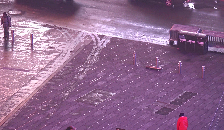

'Cp4RRAEgpeU'

''

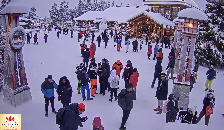

'WVslBR1Ndnc'

''

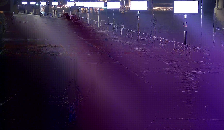

'9USNTc7Gr4c'

''

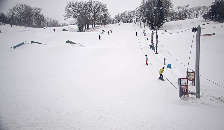

In [160]:
#_dir='9USNTc7Gr4c'
#_directory='/home/jovyan/work/data2/images'
_directory='/home/jovyan/work/data/single3'

#_dir='BJtkzEa6Tbg'
_path=_directory + '/' + _dir
#display_dir_images_hour(_path)
#display_dir_images_minute(_path,'18')
#display_dir_images0('/home/jovyan/work/data2/skip/9USNTc7Gr4c')
display_dir_images_directories(_directory)

In [122]:
_directory='/home/jovyan/work/data2/images'
listdir(_directory)

['ly',
 'P393gTj527k',
 'BJtkzEa6Tbg',
 '_VPpiOWbuv8',
 'DQe',
 'f1ydQtKxGf0',
 '4YFHDjig1hc',
 '9USNTc7Gr4c',
 'ISbvot',
 'SgUHJMzeXes',
 'RQA5RcIZlAM',
 'w8u',
 'gQ0vRX86zoo',
 'kGMOVb0IABs',
 'eLERLWTpzEM',
 'SOKol9vTpwQ',
 'VXzeDtQHTZk',
 'tUPmbZqrC6I',
 'P8WTHNphtQ8',
 'oOcqSm7PMBU',
 'mNawBricEYw',
 'hvmOoI11Dkk',
 'WInT7NRq2Ss',
 'S4AG47F94Ss',
 'tpXPYqpTSH0',
 'Z6O-6UfpGow',
 '-kh-9RBIHTo',
 'dvmRgN1FMK0',
 'hMYIc5ZPJL4',
 'AVj5mIua0bE',
 'vVyBOU9Huvo',
 '-rjDeUjXlEs',
 'sXvU5uU4-ws',
 '00s-daBWCZA',
 'Eif56OH4Fc0',
 '9En2186vo5g',
 'HmBoxDwR2I8',
 'IjSGWGt6xu8',
 'doit.txt',
 'HpdO5Kq3o7Y',
 'LwihxyJ4V20',
 'LJ5wabMQ4Vk',
 'G05wmWFDtSo',
 'KVE3aR3hlKM',
 'nKK6J66RYaw',
 'lsyMF2bmJhM',
 'frT95g0j4iY',
 'vq3XWOfFUvY',
 'Vn2SScdsrnQ',
 'WI4mP963GvE',
 '0J1Y1MlPCUY',
 'qP1y7Tdab7Y',
 'Xe64AIg',
 '2WzUGFz03v8',
 'OvwBoURRqRk',
 'c4kpeZHcke8',
 '6We73xIdHy0',
 'LWMZETF0VQY',
 'AdUw5RdyZxI',
 'BlywGRXC1B0',
 'i7PuOxnA',
 '4Hhsra66kwY',
 'xBuVIWTVX9E',
 'v-Q',
 'jQcotlKaPYY',
 'doit.t

In [50]:
listdir('../../../../../Dec-18/AdUw5RdyZxI/.ipynb_checkpoints')

['AdUw5RdyZxI_5_1639846240.4558115_Dec-18-16:50:40-2021_-checkpoint.png',
 'AdUw5RdyZxI_5_1639844400.552879_Dec-18-16:20:00-2021_-checkpoint.png',
 'AdUw5RdyZxI_5_1639845687.0056872_Dec-18-16:41:27-2021_-checkpoint.png',
 'AdUw5RdyZxI_5_1639844745.8103604_Dec-18-16:25:45-2021_-checkpoint.png']

In [52]:
# add directory to current list
app= _app_test
_video = app._tab._widgets[0]
_directory='../../../../../Dec-18'
_file=listdir(_directory)[0]
_path=_directory + '/' + _file
_video.video_directory.value=_path
_video.add_new_directory(_path)
_video.video_filename.value='test1.json'
_video.on_video_save_button_clicked('')   

In [60]:
_directory = app._displayWidget.action.directory
_files= sorted(listdir(_directory))

In [65]:
_files[0].split('_')[3].split('-')

['Dec', '18', '16:03:47', '2021']

In [28]:
_directory='/home/jovyan/work/data2/images'
_sub_directory=listdir(_directory)[6]

_path = _directory + '/' + _sub_directory
_sub_files=sorted(listdir(_path))
_app_test._tab.displayWidget.image=Image.open(_path + '/' + _sub_files[10])

_img1 = _app_test._tab.evaluateWidgetActionList({'image':_app_test._tab.displayWidget.image})['image']



#

In [26]:
#cv2.subtract(_img1,_img2)

buffer1    = np.asarray(_img1)
buffer2    = np.asarray(_img2)
buffer3    = buffer1 - buffer2
display(Image.fromarray(buffer1))
display(Image.fromarray(buffer2))
#buffer1

NameError: name '_img2' is not defined

In [29]:
#https://www.py4u.net/discuss/14401

image1 = cv2.imread(_path + '/' + _sub_files[10])
image2 = cv2.imread(_path + '/' + _sub_files[110])
difference = cv2.subtract(image1, image2)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

# add the red mask to the images to make the differences obvious
image1[mask != 255] = [0, 0, 255]
image2[mask != 255] = [0, 0, 255]

# store images
cv2.imwrite('diffOverImage1.png', image1)
cv2.imwrite('diffOverImage2.png', image1)
cv2.imwrite('diff.png', difference)

True

In [35]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

before = image1
after = image2

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image similarity", score)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

#cv2.imshow('before', before)
#cv2.imshow('after', after)
#cv2.imshow('diff',diff)
#cv2.imshow('mask',mask)
#cv2.imshow('filled after',filled_after)
#cv2.waitKey(0)
cv2.imwrite('filled_after.png', filled_after)
cv2.imwrite('mask.png', mask)

Image similarity 0.4338855258035822


True

In [32]:
filled after

SyntaxError: invalid syntax (1599408094.py, line 1)

In [26]:
#app= _app_test
#app._displayWidget.action.getPath()

In [27]:
#!mkdir -p ../../../../../test/6We73xIdHy0/
#!cp ../../../../../Dec-18/6We73xIdHy0/6We73xIdHy0_5_1639843996.9576826_Dec-18-16:13:16-2021_.png ../../../../../test/6We73xIdHy0/

In [28]:
#!ls ../data/images/single

In [29]:
def create_single_video_files(app,video_url_id_list=None):
    _video = app._tab._widgets[0]   
    for result in video_url_id_list:
        _video.on_video_new_button_clicked('')  
        _video.video_url.value=result[1]
        _video.add_new_video(result[1])
        _video.video_filename.value='../data/videos/single/images_'+result[0]+'.json'
        _video.on_video_save_button_clicked('')    

In [30]:
#_action = ImageAction()
#_action.evaluate()

In [31]:
"""
from os import listdir
app=_app_test
directory = app._tab._widgets[0].action.directory


app._tab._widgets[0].action.evaluate()['image']        
app._tab._widgets[0].action.position       
"""

"\nfrom os import listdir\napp=_app_test\ndirectory = app._tab._widgets[0].action.directory\n\n\napp._tab._widgets[0].action.evaluate()['image']        \napp._tab._widgets[0].action.position       \n"

In [32]:
#app= _app_test
#app._displayWidget.action = ImageAction()

In [33]:
#app._displayWidget.evaluate()['image']

In [34]:
#../../../../../Dec-18

In [35]:
#app=_app_test
#app._tab._widgets[0].sources.get_keys()
#LiveVideoSources('test1.json').__dict__

In [36]:
#app._tab._widgets[0].__dict__

# download images

In [167]:
import subprocess
def downloadToLocal(host='jupyter.research.dev.seeburger.de:80',user='scray', pwd='scray',
                    local_path='/home/jovyan', local_name='test' ,remote_path='webdav/test/6We73xIdHy0'):  
    try:    
        output = subprocess.check_output(['curl', '--user',user + ':' + pwd, 
                                               'http://' + host + '/' + remote_path + '/' + local_name, '-o', local_path + '/' + local_name])
        #return str(callProcess)[3:-3]
        #return output.decode('ascii')
        return output
    except Exception as e:
        return str(e)     

In [169]:
downloadToLocal(local_name='6We73xIdHy0_5_1639846126.4700105_Dec-18-16:48:46-2021_.png')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   381  100   381    0     0    576      0 --:--:-- --:--:-- --:--:--   576


b''

In [165]:
!ls -l /home/jovyan/


total 8
-rw-r--r--  1 jovyan users  381 Jan 13 15:55 6We73xIdHy0_5_1639843996.9576826_Dec-18-16:13:16-2021_.png
drwxr-xr-x 23 root   root  4096 Dec 30 14:53 work
